In [17]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc90/BHOSS_CODE"
data = "Rh20_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A0_149.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9524.561272 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 8.50597e-37 0.00110471
Total flux = 2.187651 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.199844 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.000706467
Total flux = 2.093195 Jy at 230 GHz
137:45:36.638 - Start Program


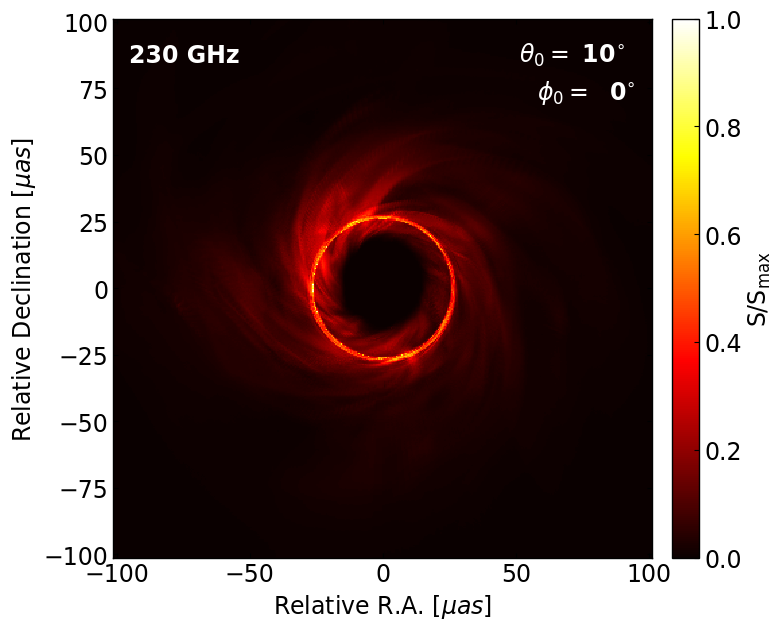

In [10]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [18]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [5]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 10, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc10/BHOSS_CODE
97, flux: 2.485324 at 9004.234232
98, flux: 2.434260 at 9014.746059
99, flux: 2.393264 at 9023.505435
100, flux: 2.308915 at 9034.016452
101, flux: 2.248193 at 9044.529609
102, flux: 2.211425 at 9053.290056
103, flux: 2.129988 at 9063.802536
104, flux: 2.077900 at 9074.314016
105, flux: 2.073659 at 9084.823874
106, flux: 2.074193 at 9093.581252
107, flux: 2.078365 at 9104.090482
108, flux: 2.065222 at 9114.601360
109, flux: 2.072675 at 9123.359993
110, flux: 2.109970 at 9133.870253
111, flux: 2.128069 at 9144.379583
112, flux: 2.136507 at 9154.889223
113, flux: 2.129220 at 9163.648327
114, flux: 2.117013 at 9174.157990
115, flux: 2.075972 at 9184.666192
116, flux: 2.066484 at 9193.424046
117, flux: 2.068924 at 9203.933544
118, flux: 2.103741 at 9214.444133
119, flux: 2.142873 at 9224.955775
120, flux: 2.165935 at 9233.717169
121, flux: 2.193572 at 9244.228854
122, flux: 2.208250 at 9254.740756
123, flux

In [6]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [7]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 1.996711 Jy, the density scale = 1.930000e-18


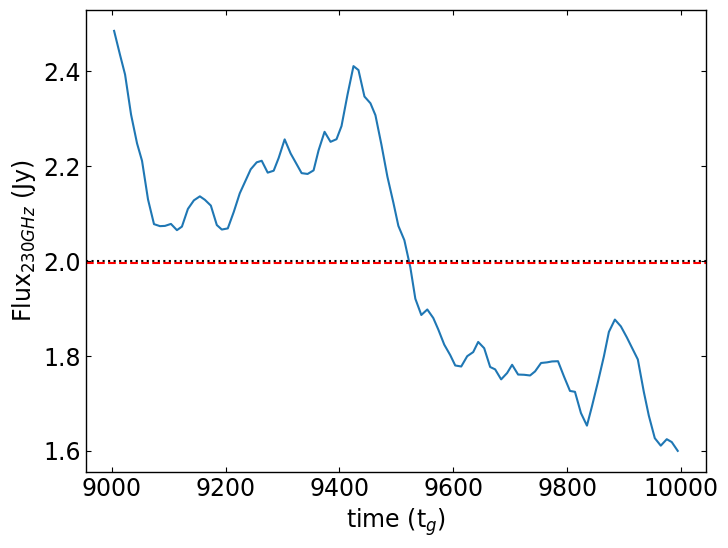

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [9]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.485324 Jy at 9004.234232
98:: 2.434260 Jy at 9014.746059
99:: 2.393264 Jy at 9023.505435
100:: 2.308915 Jy at 9034.016452
101:: 2.248193 Jy at 9044.529609
102:: 2.211425 Jy at 9053.290056
103:: 2.129988 Jy at 9063.802536
104:: 2.077900 Jy at 9074.314016
105:: 2.073659 Jy at 9084.823874
106:: 2.074193 Jy at 9093.581252
107:: 2.078365 Jy at 9104.090482
108:: 2.065222 Jy at 9114.601360
109:: 2.072675 Jy at 9123.359993
110:: 2.109970 Jy at 9133.870253
111:: 2.128069 Jy at 9144.379583
112:: 2.136507 Jy at 9154.889223
113:: 2.129220 Jy at 9163.648327
114:: 2.117013 Jy at 9174.157990
115:: 2.075972 Jy at 9184.666192
116:: 2.066484 Jy at 9193.424046
117:: 2.068924 Jy at 9203.933544
118:: 2.103741 Jy at 9214.444133
119:: 2.142873 Jy at 9224.955775
120:: 2.165935 Jy at 9233.717169
121:: 2.193572 Jy at 9244.228854
122:: 2.208250 Jy at 9254.740756
123:: 2.211487 Jy at 9263.502558
124:: 2.186470 Jy at 9274.015079
125:: 2.190534 Jy at 9284.527261
126:: 2.217438 Jy at 9293.287130
127:: 2.25657

In [19]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 30, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc30/BHOSS_CODE
97, flux: 2.667980 at 9004.234232
98, flux: 2.616381 at 9014.746059
99, flux: 2.570410 at 9023.505435
100, flux: 2.484696 at 9034.016452
101, flux: 2.414995 at 9044.529609
102, flux: 2.374247 at 9053.290056
103, flux: 2.288226 at 9063.802536
104, flux: 2.215351 at 9074.314016
105, flux: 2.194703 at 9084.823874
106, flux: 2.193710 at 9093.581252
107, flux: 2.225936 at 9104.090482
108, flux: 2.204953 at 9114.601360
109, flux: 2.196400 at 9123.359993
110, flux: 2.211189 at 9133.870253
111, flux: 2.226532 at 9144.379583
112, flux: 2.228343 at 9154.889223
113, flux: 2.218243 at 9163.648327
114, flux: 2.193496 at 9174.157990
115, flux: 2.132833 at 9184.666192
116, flux: 2.107905 at 9193.424046
117, flux: 2.094131 at 9203.933544
118, flux: 2.112306 at 9214.444133
119, flux: 2.142996 at 9224.955775
120, flux: 2.169020 at 9233.717169
121, flux: 2.207563 at 9244.228854
122, flux: 2.235472 at 9254.740756
123, flux

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.068152 Jy, the density scale = 1.830000e-18


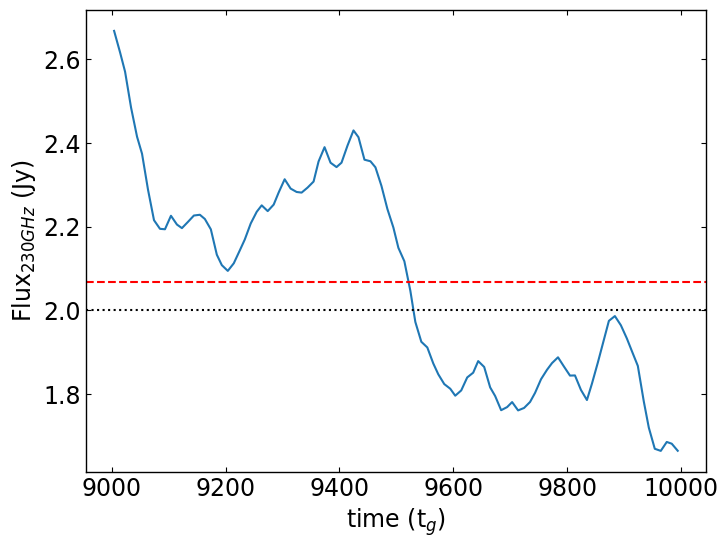

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.667980 Jy at 9004.234232
98:: 2.616381 Jy at 9014.746059
99:: 2.570410 Jy at 9023.505435
100:: 2.484696 Jy at 9034.016452
101:: 2.414995 Jy at 9044.529609
102:: 2.374247 Jy at 9053.290056
103:: 2.288226 Jy at 9063.802536
104:: 2.215351 Jy at 9074.314016
105:: 2.194703 Jy at 9084.823874
106:: 2.193710 Jy at 9093.581252
107:: 2.225936 Jy at 9104.090482
108:: 2.204953 Jy at 9114.601360
109:: 2.196400 Jy at 9123.359993
110:: 2.211189 Jy at 9133.870253
111:: 2.226532 Jy at 9144.379583
112:: 2.228343 Jy at 9154.889223
113:: 2.218243 Jy at 9163.648327
114:: 2.193496 Jy at 9174.157990
115:: 2.132833 Jy at 9184.666192
116:: 2.107905 Jy at 9193.424046
117:: 2.094131 Jy at 9203.933544
118:: 2.112306 Jy at 9214.444133
119:: 2.142996 Jy at 9224.955775
120:: 2.169020 Jy at 9233.717169
121:: 2.207563 Jy at 9244.228854
122:: 2.235472 Jy at 9254.740756
123:: 2.250867 Jy at 9263.502558
124:: 2.237096 Jy at 9274.015079
125:: 2.252593 Jy at 9284.527261
126:: 2.281587 Jy at 9293.287130
127:: 2.31323

In [24]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 50, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc50/BHOSS_CODE
97, flux: 2.787994 at 9004.234232
98, flux: 2.722961 at 9014.746059
99, flux: 2.669608 at 9023.505435
100, flux: 2.580644 at 9034.016452
101, flux: 2.504177 at 9044.529609
102, flux: 2.454984 at 9053.290056
103, flux: 2.352800 at 9063.802536
104, flux: 2.251147 at 9074.314016
105, flux: 2.207493 at 9084.823874
106, flux: 2.205134 at 9093.581252
107, flux: 2.243147 at 9104.090482
108, flux: 2.197291 at 9114.601360
109, flux: 2.177143 at 9123.359993
110, flux: 2.182607 at 9133.870253
111, flux: 2.214701 at 9144.379583
112, flux: 2.221716 at 9154.889223
113, flux: 2.213549 at 9163.648327
114, flux: 2.188028 at 9174.157990
115, flux: 2.094736 at 9184.666192
116, flux: 2.042631 at 9193.424046
117, flux: 2.021591 at 9203.933544
118, flux: 2.036007 at 9214.444133
119, flux: 2.060759 at 9224.955775
120, flux: 2.090862 at 9233.717169
121, flux: 2.125845 at 9244.228854
122, flux: 2.158591 at 9254.740756
123, flux

In [25]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [26]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.067856 Jy, the density scale = 1.670000e-18


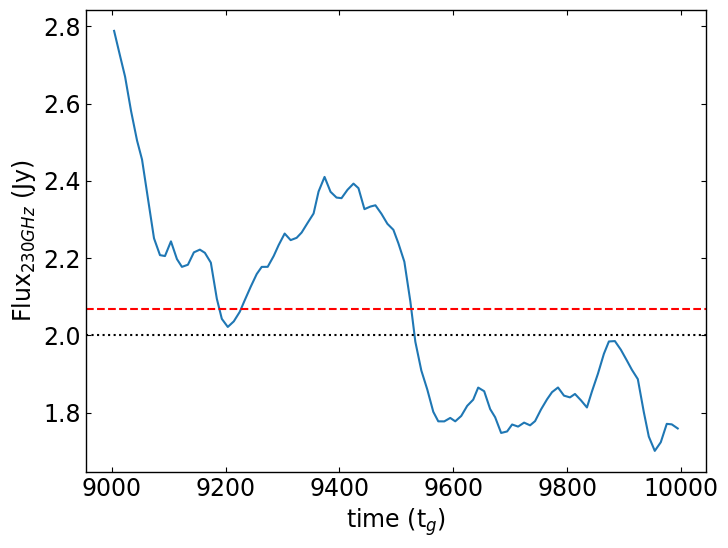

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [28]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.787994 Jy at 9004.234232
98:: 2.722961 Jy at 9014.746059
99:: 2.669608 Jy at 9023.505435
100:: 2.580644 Jy at 9034.016452
101:: 2.504177 Jy at 9044.529609
102:: 2.454984 Jy at 9053.290056
103:: 2.352800 Jy at 9063.802536
104:: 2.251147 Jy at 9074.314016
105:: 2.207493 Jy at 9084.823874
106:: 2.205134 Jy at 9093.581252
107:: 2.243147 Jy at 9104.090482
108:: 2.197291 Jy at 9114.601360
109:: 2.177143 Jy at 9123.359993
110:: 2.182607 Jy at 9133.870253
111:: 2.214701 Jy at 9144.379583
112:: 2.221716 Jy at 9154.889223
113:: 2.213549 Jy at 9163.648327
114:: 2.188028 Jy at 9174.157990
115:: 2.094736 Jy at 9184.666192
116:: 2.042631 Jy at 9193.424046
117:: 2.021591 Jy at 9203.933544
118:: 2.036007 Jy at 9214.444133
119:: 2.060759 Jy at 9224.955775
120:: 2.090862 Jy at 9233.717169
121:: 2.125845 Jy at 9244.228854
122:: 2.158591 Jy at 9254.740756
123:: 2.177047 Jy at 9263.502558
124:: 2.177228 Jy at 9274.015079
125:: 2.205179 Jy at 9284.527261
126:: 2.233594 Jy at 9293.287130
127:: 2.26332

In [29]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 70, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc70/BHOSS_CODE
97, flux: 2.760849 at 9004.234232
98, flux: 2.696011 at 9014.746059
99, flux: 2.640327 at 9023.505435
100, flux: 2.546665 at 9034.016452
101, flux: 2.455373 at 9044.529609
102, flux: 2.376131 at 9053.290056
103, flux: 2.263624 at 9063.802536
104, flux: 2.185049 at 9074.314016
105, flux: 2.168284 at 9084.823874
106, flux: 2.147232 at 9093.581252
107, flux: 2.172543 at 9104.090482
108, flux: 2.149556 at 9114.601360
109, flux: 2.131038 at 9123.359993
110, flux: 2.128073 at 9133.870253
111, flux: 2.201880 at 9144.379583
112, flux: 2.205822 at 9154.889223
113, flux: 2.170577 at 9163.648327
114, flux: 2.018707 at 9174.157990
115, flux: 1.885174 at 9184.666192
116, flux: 1.883498 at 9193.424046
117, flux: 1.917759 at 9203.933544
118, flux: 1.958990 at 9214.444133
119, flux: 2.021363 at 9224.955775
120, flux: 2.051810 at 9233.717169
121, flux: 2.065387 at 9244.228854
122, flux: 2.095534 at 9254.740756
123, flux

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.009941 Jy, the density scale = 1.520000e-18


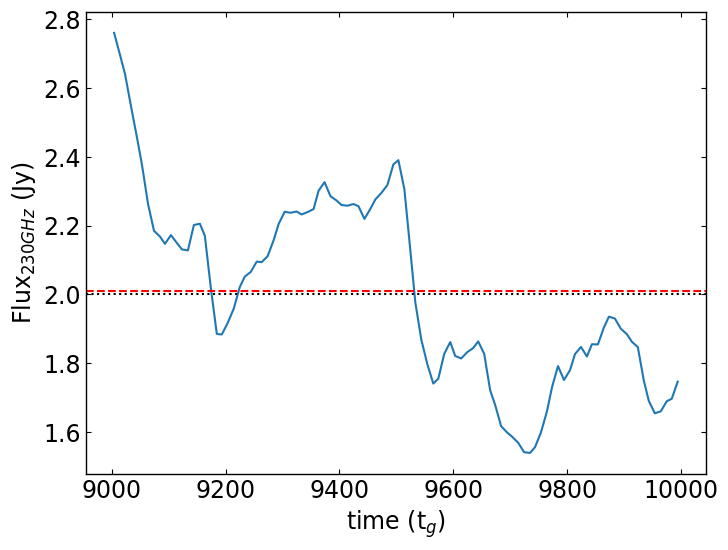

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [33]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.760849 Jy at 9004.234232
98:: 2.696011 Jy at 9014.746059
99:: 2.640327 Jy at 9023.505435
100:: 2.546665 Jy at 9034.016452
101:: 2.455373 Jy at 9044.529609
102:: 2.376131 Jy at 9053.290056
103:: 2.263624 Jy at 9063.802536
104:: 2.185049 Jy at 9074.314016
105:: 2.168284 Jy at 9084.823874
106:: 2.147232 Jy at 9093.581252
107:: 2.172543 Jy at 9104.090482
108:: 2.149556 Jy at 9114.601360
109:: 2.131038 Jy at 9123.359993
110:: 2.128073 Jy at 9133.870253
111:: 2.201880 Jy at 9144.379583
112:: 2.205822 Jy at 9154.889223
113:: 2.170577 Jy at 9163.648327
114:: 2.018707 Jy at 9174.157990
115:: 1.885174 Jy at 9184.666192
116:: 1.883498 Jy at 9193.424046
117:: 1.917759 Jy at 9203.933544
118:: 1.958990 Jy at 9214.444133
119:: 2.021363 Jy at 9224.955775
120:: 2.051810 Jy at 9233.717169
121:: 2.065387 Jy at 9244.228854
122:: 2.095534 Jy at 9254.740756
123:: 2.093913 Jy at 9263.502558
124:: 2.111604 Jy at 9274.015079
125:: 2.158281 Jy at 9284.527261
126:: 2.205251 Jy at 9293.287130
127:: 2.24032

In [34]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 90, 0, "MADS41A0")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc90/BHOSS_CODE
97, flux: 2.739635 at 9004.234232
98, flux: 2.738113 at 9014.746059
99, flux: 2.685385 at 9023.505435
100, flux: 2.564648 at 9034.016452
101, flux: 2.479600 at 9044.529609
102, flux: 2.425462 at 9053.290056
103, flux: 2.343513 at 9063.802536
104, flux: 2.322991 at 9074.314016
105, flux: 2.185264 at 9084.823874
106, flux: 2.329553 at 9093.581252
107, flux: 2.367681 at 9104.090482
108, flux: 2.438566 at 9114.601360
109, flux: 2.389106 at 9123.359993
110, flux: 2.395662 at 9133.870253
111, flux: 2.543803 at 9144.379583
112, flux: 2.514974 at 9154.889223
113, flux: 2.490328 at 9163.648327
114, flux: 2.144382 at 9174.157990
115, flux: 1.965526 at 9184.666192
116, flux: 1.998104 at 9193.424046
117, flux: 2.091087 at 9203.933544
118, flux: 2.142868 at 9214.444133
119, flux: 2.225867 at 9224.955775
120, flux: 2.262427 at 9233.717169
121, flux: 2.278303 at 9244.228854
122, flux: 2.280772 at 9254.740756
123, flux

In [35]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [36]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA0/Rh20/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 97/196/100
average z_tot = 2.072301 Jy, the density scale = 1.510000e-18


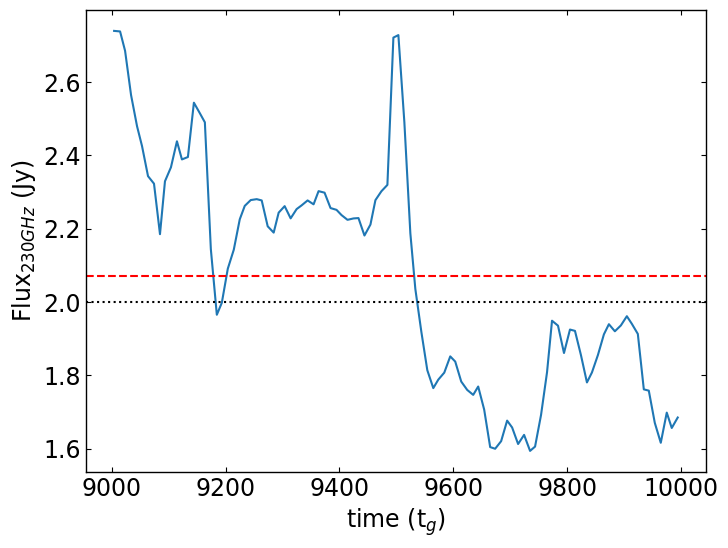

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [38]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

97:: 2.739635 Jy at 9004.234232
98:: 2.738113 Jy at 9014.746059
99:: 2.685385 Jy at 9023.505435
100:: 2.564648 Jy at 9034.016452
101:: 2.479600 Jy at 9044.529609
102:: 2.425462 Jy at 9053.290056
103:: 2.343513 Jy at 9063.802536
104:: 2.322991 Jy at 9074.314016
105:: 2.185264 Jy at 9084.823874
106:: 2.329553 Jy at 9093.581252
107:: 2.367681 Jy at 9104.090482
108:: 2.438566 Jy at 9114.601360
109:: 2.389106 Jy at 9123.359993
110:: 2.395662 Jy at 9133.870253
111:: 2.543803 Jy at 9144.379583
112:: 2.514974 Jy at 9154.889223
113:: 2.490328 Jy at 9163.648327
114:: 2.144382 Jy at 9174.157990
115:: 1.965526 Jy at 9184.666192
116:: 1.998104 Jy at 9193.424046
117:: 2.091087 Jy at 9203.933544
118:: 2.142868 Jy at 9214.444133
119:: 2.225867 Jy at 9224.955775
120:: 2.262427 Jy at 9233.717169
121:: 2.278303 Jy at 9244.228854
122:: 2.280772 Jy at 9254.740756
123:: 2.277251 Jy at 9263.502558
124:: 2.206724 Jy at 9274.015079
125:: 2.189526 Jy at 9284.527261
126:: 2.243978 Jy at 9293.287130
127:: 2.26171